# ADS 509 Assignment 2.1: Tokenization, Normalization, Descriptive Statistics 

This notebook holds Assignment 2.1 for Module 2 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In the previous assignment you pulled lyrics data on two artists. In this assignment we explore this data set and a pull from the now-defunct Twitter API for the artists Cher and Robyn.  If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Canvas. 

This assignment asks you to write a short function to calculate some descriptive statistics on a piece of text. Then you are asked to find some interesting and unique statistics on your corpora. 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [29]:
import os
import re
import emoji
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
import nltk
nltk.download('stopwords', download_dir='/Users/justinfarnan_hakkoda/ads_text_mining/M2/Tokenization-Normalization-and-Descriptive-Statistics/nltk_data')
from nltk.corpus import stopwords
from string import punctuation
sw = stopwords.words("english")
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /Users/justinfarnan_hakko
[nltk_data]     da/ads_text_mining/M2/Tokenization-Normalization-and-
[nltk_data]     Descriptive-Statistics/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/justinfarnan_hakkoda/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
# Add any additional import statements you need here
import csv
import os
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer 
import re
# Code to download corpora
import nltk
nltk.download('stopwords')
nltk.download('wordnet')




[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/justinfarnan_hakkoda/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/justinfarnan_hakkoda/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [31]:
# change `data_location` to the location of the folder on your machine.
data_location = "/Users/justinfarnan_hakkoda/ads_text_mining/M2/Tokenization-Normalization-and-Descriptive-Statistics/M1_Results"
print(data_location)
# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

/Users/justinfarnan_hakkoda/ads_text_mining/M2/Tokenization-Normalization-and-Descriptive-Statistics/M1_Results


In [32]:
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity), 
        and num_tokens most common tokens. Return a list with the number of tokens, number
        of unique tokens, lexical diversity, and number of characters. 
    
    """

    # Fill in the correct values here. 
    num_tokens = len(tokens)
    num_unique_tokens = len(set(tokens))
    lexical_diversity = len(set(tokens)) / len(tokens)
    num_characters = (sum(len(token) for token in tokens))
    
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
    
        # print the five most common tokens
        
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])
    

In [33]:
text = "here is some example text with other example text here in this text".split()
assert(descriptive_stats(text, verbose=True)[0] == 13)
assert(descriptive_stats(text, verbose=False)[1] == 9)
assert(abs(descriptive_stats(text, verbose=False)[2] - 0.69) < 0.02)
assert(descriptive_stats(text, verbose=False)[3] == 55)


There are 13 tokens in the data.
There are 9 unique tokens in the data.
There are 55 characters in the data.
The lexical diversity is 0.692 in the data.


Q: Why is it beneficial to use assertion statements in your code? 

A: Assertion statements are a great way to go about testing and debugging your code. It is also beneficial cause you are able to do error handling with assertion statements. Basically what they do is go through and see if the statment inside or condition inside is true and if it is not it throws an Assetion Error.

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




In [34]:
# Read in the lyrics data

lyrics_data = pd.DataFrame(columns = ['artist', 'song', 'lyris'])

for artist in os.listdir(f'{data_location}/lyrics'):
    artist_folder = os.path.join(data_location, 'lyrics', artist)
    for song in os.listdir(artist_folder):
        song_file = os.path.join(artist_folder, song)
        with open(song_file, 'r') as file:
            lyrics = file.read()
            new_row = pd.DataFrame({'artist': [artist], 'song': [song], 'lyrics': [lyrics]})
            lyrics_data = pd.concat([lyrics_data, new_row], ignore_index=True)

In [35]:
lyrics_data

,artist,song,lyris,lyrics
0,robyn,robyn_includemeout.txt,NaN,"""Include Me Out""\n\n\n\nIt is really very simp..."
1,robyn,robyn_electric.txt,NaN,"""Electric""\n\n\n\nElectric...\n\nIt's electric..."
2,robyn,robyn_beach2k20.txt,NaN,"""Beach 2K20""\n\n\n\n(So you wanna go out?\nHow..."
3,robyn,robyn_lovekills.txt,NaN,"""Love Kills""\n\n\n\nIf you're looking for love..."
4,robyn,robyn_timemachine.txt,NaN,"""Time Machine""\n\n\n\nHey, what did I do?\nCan..."
...,...,...,...,...
415,cher,cher_takeitfromtheboys.txt,NaN,"""Take It From The Boys""\n\n\n\nSo scared I nev..."
416,cher,cher_dreambaby.txt,NaN,"""Dream Baby""\n\n\n\nI found the boy for me\nHe..."
417,cher,cher_pleasedonttellme.txt,NaN,"""Please Don't Tell Me""\n\n\n\nYa shook the ove..."
418,cher,cher_ihopeyoufindit.txt,NaN,"""I Hope You Find It""\n\n\n\nThese clouds aren'..."


In [36]:
twitter_dfs = []
for file in os.listdir(f'{data_location}/twitter'):
    if file == ".DS_Store":
        continue
    if file.endswith("_data.txt"):  # Check for "_data.txt" specifically
        file_path = os.path.join(data_location, 'twitter', file)
        print(file_path)
        with open(file_path, 'r') as file_obj:
            content = file_obj.read()
            lines = content.splitlines()
            column_names = lines[0].split('\t')
            data = [line.split('\t') for line in lines[1:]]
            twitter_df = pd.DataFrame(data, columns=column_names)
            twitter_dfs.append(twitter_df)
print(len(twitter_dfs))  # Check the length of the list
twitter_df = pd.concat(twitter_dfs)


/Users/justinfarnan_hakkoda/ads_text_mining/M2/Tokenization-Normalization-and-Descriptive-Statistics/M1_Results/twitter/cher_followers_data.txt
/Users/justinfarnan_hakkoda/ads_text_mining/M2/Tokenization-Normalization-and-Descriptive-Statistics/M1_Results/twitter/robynkonichiwa_followers_data.txt
2


In [37]:
follower_ids_dfs = []
for file in os.listdir(f'{data_location}/twitter'):
    if file == ".DS_Store":
        continue
    if file.endswith("followers.txt"):  # Check for "followers.txt" specifically
        file_path = os.path.join(data_location, 'twitter', file)
        print(file_path)
        artist_name = file.split('_')[0]  # Extract the artist name from the file name
        with open(file_path, 'r') as file_obj:
            content = file_obj.read()
            lines = content.splitlines()
            follower_ids = [line.split('\t')[0] for line in lines[1:]]  # Extract the first column (follower IDs)
            follower_ids_df = pd.DataFrame(follower_ids, columns=['id'])
            follower_ids_df['artist_name'] = artist_name  # Add the artist name as a new column
            follower_ids_dfs.append(follower_ids_df)
print(len(follower_ids_dfs))  # Check the length of the list
follower_ids_concat = pd.concat(follower_ids_dfs)

/Users/justinfarnan_hakkoda/ads_text_mining/M2/Tokenization-Normalization-and-Descriptive-Statistics/M1_Results/twitter/cher_followers.txt
/Users/justinfarnan_hakkoda/ads_text_mining/M2/Tokenization-Normalization-and-Descriptive-Statistics/M1_Results/twitter/robynkonichiwa_followers.txt
2


In [38]:
twitter_df.head()

,screen_name,name,id,location,followers_count,friends_count,description
0,hsmcnp,Country Girl,35152213,,1302,1014,
1,horrormomy,Jeny,742153090850164742,Earth,81,514,𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜
2,anju79990584,anju,1496463006451974150,,13,140,163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡
3,gallionjenna,J,3366479914,,752,556,csu
4,bcscomm,bcscomm,83915043,"Washington, DC",888,2891,Writer @Washinformer @SpelmanCollege alumna #D...


In [39]:
follower_ids_concat.tail()

,id,artist_name
358456,517669236,robynkonichiwa
358457,333029341,robynkonichiwa
358458,397990675,robynkonichiwa
358459,60245011,robynkonichiwa
358460,44946331,robynkonichiwa


In [40]:
joined_twitter_data = pd.merge(twitter_df, follower_ids_concat, on = 'id', how='inner')

In [41]:
joined_twitter_data.head()

,screen_name,name,id,location,followers_count,friends_count,description,artist_name
0,hsmcnp,Country Girl,35152213,,1302,1014,,cher
1,horrormomy,Jeny,742153090850164742,Earth,81,514,𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜,cher
2,anju79990584,anju,1496463006451974150,,13,140,163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡,cher
3,gallionjenna,J,3366479914,,752,556,csu,cher
4,bcscomm,bcscomm,83915043,"Washington, DC",888,2891,Writer @Washinformer @SpelmanCollege alumna #D...,cher


## Data Cleaning

Now clean and tokenize your data. Remove punctuation chacters (available in the `punctuation` object in the `string` library), split on whitespace, fold to lowercase, and remove stopwords. Store your cleaned data, which must be accessible as an interable for `descriptive_stats`, in new objects or in new columns in your data frame. 



In [42]:
stopwords_list = stopwords.words('english')
def clean_tokenize(text):
    # Remove punctuation
    text_no_punct = ''.join(char for char in text if char not in punctuation)
    # Split on whitespace
    tokens = word_tokenize(text_no_punct)
    # Fold to lowercase
    tokens_lower = [token.lower() for token in tokens]
    # Remove stopwords
    tokens_no_stopwords = [token for token in tokens_lower if token not in stopwords_list]
    return tokens_no_stopwords

In [43]:
# create your clean twitter data here
joined_twitter_data['cleaned_description'] = joined_twitter_data['description'].apply(clean_tokenize)

In [44]:
# check to see if the tokeninzation and cleaning went properly
joined_twitter_data.head()

,screen_name,name,id,location,followers_count,friends_count,description,artist_name,cleaned_description
0,hsmcnp,Country Girl,35152213,,1302,1014,,cher,[]
1,horrormomy,Jeny,742153090850164742,Earth,81,514,𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜,cher,"[𝙿𝚛𝚘𝚞𝚍, 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛, 𝚘𝚏, 𝚖𝚎𝚜𝚜𝚢, 𝚋𝚞𝚗𝚜, 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜]"
2,anju79990584,anju,1496463006451974150,,13,140,163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡,cher,"[163㎝／愛かっぷ💜26歳🍒, 工〇好きな女の子💓, フォローしてくれたらdmします🧡]"
3,gallionjenna,J,3366479914,,752,556,csu,cher,[csu]
4,bcscomm,bcscomm,83915043,"Washington, DC",888,2891,Writer @Washinformer @SpelmanCollege alumna #D...,cher,"[writer, washinformer, spelmancollege, alumna,..."


In [45]:
# create your clean lyrics data here
lyrics_data['lyrics_clean'] = lyrics_data['lyrics'].apply(clean_tokenize)

In [46]:
lyrics_data

,artist,song,lyris,lyrics,lyrics_clean
0,robyn,robyn_includemeout.txt,NaN,"""Include Me Out""\n\n\n\nIt is really very simp...","[include, really, simple, single, pulse, repea..."
1,robyn,robyn_electric.txt,NaN,"""Electric""\n\n\n\nElectric...\n\nIt's electric...","[electric, electric, electric, natural, high, ..."
2,robyn,robyn_beach2k20.txt,NaN,"""Beach 2K20""\n\n\n\n(So you wanna go out?\nHow...","[beach, 2k20, wan, na, go, gon, na, get, ok, c..."
3,robyn,robyn_lovekills.txt,NaN,"""Love Kills""\n\n\n\nIf you're looking for love...","[love, kills, youre, looking, love, get, heart..."
4,robyn,robyn_timemachine.txt,NaN,"""Time Machine""\n\n\n\nHey, what did I do?\nCan...","[time, machine, hey, cant, believe, fit, threw..."
...,...,...,...,...,...
415,cher,cher_takeitfromtheboys.txt,NaN,"""Take It From The Boys""\n\n\n\nSo scared I nev...","[take, boys, scared, never, hard, keep, good, ..."
416,cher,cher_dreambaby.txt,NaN,"""Dream Baby""\n\n\n\nI found the boy for me\nHe...","[dream, baby, found, boy, hes, dream, baby, do..."
417,cher,cher_pleasedonttellme.txt,NaN,"""Please Don't Tell Me""\n\n\n\nYa shook the ove...","[please, dont, tell, ya, shook, override, whyd..."
418,cher,cher_ihopeyoufindit.txt,NaN,"""I Hope You Find It""\n\n\n\nThese clouds aren'...","[hope, find, clouds, arent, going, nowhere, da..."


## Basic Descriptive Statistics

Call your `descriptive_stats` function on both your lyrics data and your twitter data and for both artists (four total calls). 

In [47]:
# calls to descriptive_stats here
for text in lyrics_data['lyrics_clean']:
    try:
        tokens = text  # Add this line to get the tokens from the text
        stats_verbose_true = descriptive_stats(text, verbose=True)
        stats_verbose_false = descriptive_stats(text, verbose=False)
        expected_num_tokens = len(tokens)
        expected_num_unique_tokens = len(set(tokens))
        expected_lexical_diversity = len(set(tokens)) / len(tokens)
        expected_num_characters = sum(len(token) for token in tokens)
        
        assert(stats_verbose_true[0] == expected_num_tokens)
        assert(stats_verbose_false[1] == expected_num_unique_tokens)
        assert(abs(stats_verbose_false[2] - expected_lexical_diversity) < 0.02)
        assert(stats_verbose_false[3] == expected_num_characters)
    except AssertionError:
        print(f"Assertion failed for text: {text}")
    except Exception as e:
        print(f"Error processing text: {text}. Error: {e}")

There are 235 tokens in the data.
There are 89 unique tokens in the data.
There are 1186 characters in the data.
The lexical diversity is 0.379 in the data.
There are 153 tokens in the data.
There are 63 unique tokens in the data.
There are 818 characters in the data.
The lexical diversity is 0.412 in the data.
There are 184 tokens in the data.
There are 35 unique tokens in the data.
There are 713 characters in the data.
The lexical diversity is 0.190 in the data.
There are 246 tokens in the data.
There are 42 unique tokens in the data.
There are 1162 characters in the data.
The lexical diversity is 0.171 in the data.
There are 129 tokens in the data.
There are 53 unique tokens in the data.
There are 624 characters in the data.
The lexical diversity is 0.411 in the data.
There are 247 tokens in the data.
There are 42 unique tokens in the data.
There are 1167 characters in the data.
The lexical diversity is 0.170 in the data.
There are 113 tokens in the data.
There are 70 unique tokens 

In [48]:
## set a counter to only print out 100 values cause my computer crashed twice 
counter = 0
for text in joined_twitter_data['cleaned_description']:
    try:
        tokens = text  # Add this line to get the tokens from the text
        stats_verbose_true = descriptive_stats(text, verbose=True)
        stats_verbose_false = descriptive_stats(text, verbose=False)
        expected_num_tokens = len(tokens)
        expected_num_unique_tokens = len(set(tokens))
        expected_lexical_diversity = len(set(tokens)) / len(tokens)
        expected_num_characters = sum(len(token) for token in tokens)
        
        assert(stats_verbose_true[0] == expected_num_tokens)
        assert(stats_verbose_false[1] == expected_num_unique_tokens)
        assert(abs(stats_verbose_false[2] - expected_lexical_diversity) < 0.02)
        assert(stats_verbose_false[3] == expected_num_characters)
    except AssertionError:
        print(f"Assertion failed for text: {text}")
    except Exception as e:
        print(f"Error processing text: {text}. Error: {e}")
    
    counter += 1
    if counter >= 100:
        break

Error processing text: []. Error: division by zero
There are 6 tokens in the data.
There are 6 unique tokens in the data.
There are 33 characters in the data.
The lexical diversity is 1.000 in the data.
There are 3 tokens in the data.
There are 3 unique tokens in the data.
There are 39 characters in the data.
The lexical diversity is 1.000 in the data.
There are 1 tokens in the data.
There are 1 unique tokens in the data.
There are 3 characters in the data.
The lexical diversity is 1.000 in the data.
There are 17 tokens in the data.
There are 17 unique tokens in the data.
There are 122 characters in the data.
The lexical diversity is 1.000 in the data.
Error processing text: []. Error: division by zero
There are 5 tokens in the data.
There are 5 unique tokens in the data.
There are 27 characters in the data.
The lexical diversity is 1.000 in the data.
There are 2 tokens in the data.
There are 2 unique tokens in the data.
There are 10 characters in the data.
The lexical diversity is 1.0

Q: How do you think the "top 5 words" would be different if we left stopwords in the data? 

A: If we left the stop words in we would see alot of filler words which we could ptoentially see as the top 5. When we look at a sentence or paragraph we don't look at words like a, but, the, they, is...etc. Those are just filler words to help make a sentence, we only care about important words to ully udnerstand the topic of the paragraph. For ex we can about, money, bitcoin, postive, negative, crash etc, these words have more impact to us on understanding on what is going on. 

---

Q: What were your prior beliefs about the lexical diversity between the artists? Does the difference (or lack thereof) in lexical diversity between the artists conform to your prior beliefs? 

A: so my prior belief of lexical diversity was the amount of unique words in a text, or in our ase in song lyrics. I know the above output does have artist names in them but the top have is robyn and teh bottom half is cher (based of the order of the df above). It is intersting to see that some songs by either have more lexical diversity than others. But this makes sense in the context of music. Why? Cause if you think about music alot of hit songs are the same phrases or words repeated over a catchy beat which cuts down on unique words, while other songs may have more unique words as it maybe more storytelling and descritpive. If teh song is closer to 0 then it has no less diversity in words and if its greateer than lets say .5 it has more dversity in lyrics. 



## Specialty Statistics

The descriptive statistics we have calculated are quite generic. You will now calculate a handful of statistics tailored to these data.

1. Ten most common emojis by artist in the twitter descriptions.
1. Ten most common hashtags by artist in the twitter descriptions.
1. Five most common words in song titles by artist. 
1. For each artist, a histogram of song lengths (in terms of number of tokens) 

We can use the `emoji` library to help us identify emojis and you have been given a function to help you.


In [26]:
assert(emoji.is_emoji("❤️"))
assert(not emoji.is_emoji(":-)"))

### Emojis 😁

What are the ten most common emojis by artist in the twitter descriptions? 


In [23]:
# Your code here
emoji_counts = {}
for description in joined_twitter_data['description']:
    # Find all emojis in the description
    for word in description.split():
        if emoji.is_emoji(word):
            # If the emoji is already in the dictionary, increment its count
            if word in emoji_counts:
                emoji_counts[word] += 1
            # Otherwise, add it to the dictionary with a count of 1
            else:
                emoji_counts[word] = 1
# Sort the emoji counts in descending order and get the top 10
top_10_emojis = sorted(emoji_counts.items(), key=lambda x: x[1], reverse=True)[:10]

# Print the top 10 emojis and their counts
for emoji, count in top_10_emojis:
    print(f'{emoji}: {count}')

AttributeError: 'str' object has no attribute 'is_emoji'

In [49]:
emoji_counts = {}
artist_emoji_counts = {}
for index, row in joined_twitter_data.iterrows():
    description = row['description']
    artist_name = row['artist_name']
    # Find all emojis in the description
    for word in description.split():
        if emoji.is_emoji(word):
            # If the emoji is already in the dictionary, increment its count
            if word in emoji_counts:
                emoji_counts[word] += 1
            # Otherwise, add it to the dictionary with a count of 1
            else:
                emoji_counts[word] = 1
            # Also, add the emoji count to the artist's dictionary
            if artist_name in artist_emoji_counts:
                if word in artist_emoji_counts[artist_name]:
                    artist_emoji_counts[artist_name][word] += 1
                else:
                    artist_emoji_counts[artist_name][word] = 1
            else:
                artist_emoji_counts[artist_name] = {word: 1}
# Sort the emoji counts in descending order and get the top 10
top_10_emojis = sorted(emoji_counts.items(), key=lambda x: x[1], reverse=True)[:10]

# Print the top 10 emojis and their counts
for emoji, count in top_10_emojis:
    print(f'{emoji}: {count}')

# Also, print the top 10 emojis for each artist
for artist, emoji_count in artist_emoji_counts.items():
    top_10_emojis = sorted(emoji_count.items(), key=lambda x: x[1], reverse=True)[:10]
    print(f'Top 10 emojis for {artist}:')
    for emoji, count in top_10_emojis:
        print(f'{emoji}: {count}')

🏳️‍🌈: 16412
❤️: 15466
♥: 11093
❤: 10081
✨: 9335
🌈: 6212
💙: 3817
💜: 3728
🇺🇸: 3703
💕: 3394
Top 10 emojis for cher:
❤️: 14261
🏳️‍🌈: 14002
♥: 9805
❤: 9338
✨: 8342
🌈: 5443
💙: 3577
🇺🇸: 3504
💜: 3448
💕: 3185
Top 10 emojis for robynkonichiwa:
🏳️‍🌈: 2410
♥: 1288
❤️: 1205
✨: 993
🌈: 769
❤: 743
🎶: 336
🖤: 285
💜: 280
🎧: 258


### Hashtags

What are the ten most common hashtags by artist in the twitter descriptions? 


In [172]:
# Your code here
hashtag_counts = {}
for description in twitter_df['description']:
    # Find all hashtags in the description using regular expression
    hashtags = re.findall(r'#\w+', description)
    
    # Loop through each hashtag
    for hashtag in hashtags:
        # If the hashtag is already in the dictionary, increment its count
        if hashtag in hashtag_counts:
            hashtag_counts[hashtag] += 1
        # Otherwise, add it to the dictionary with a count of 1
        else:
            hashtag_counts[hashtag] = 1

# Sort the hashtag counts in descending order and get the top 10
top_10_hashtags = sorted(hashtag_counts.items(), key=lambda x: x[1], reverse=True)[:10]

# Print the top 10 hashtags and their counts
for hashtag, count in top_10_hashtags:
    print(f'{hashtag}: {count}')

#BLM: 9841
#Resist: 6079
#BlackLivesMatter: 5018
#resist: 3825
#FBR: 3252
#TheResistance: 3013
#blacklivesmatter: 2853
#1: 2826
#Resistance: 1929
#LGBTQ: 1889


In [51]:
hashtag_counts = {}
artist_hashtag_counts = {}
for index, row in joined_twitter_data.iterrows():
    description = row['description']
    artist_name = row['artist_name']
    # Find all hashtags in the description using regular expression
    hashtags = re.findall(r'#\w+', description)
    
    # Loop through each hashtag
    for hashtag in hashtags:
        # If the hashtag is already in the dictionary, increment its count
        if hashtag in hashtag_counts:
            hashtag_counts[hashtag] += 1
        # Otherwise, add it to the dictionary with a count of 1
        else:
            hashtag_counts[hashtag] = 1
        # Also, add the hashtag count to the artist's dictionary
        if artist_name in artist_hashtag_counts:
            if hashtag in artist_hashtag_counts[artist_name]:
                artist_hashtag_counts[artist_name][hashtag] += 1
            else:
                artist_hashtag_counts[artist_name][hashtag] = 1
        else:
            artist_hashtag_counts[artist_name] = {hashtag: 1}

# Sort the hashtag counts in descending order and get the top 10
top_10_hashtags = sorted(hashtag_counts.items(), key=lambda x: x[1], reverse=True)[:10]

# # Print the top 10 hashtags and their counts
# for hashtag, count in top_10_hashtags:
#     print(f'{hashtag}: {count}')

# Also, print the top 10 hashtags for each artist
for artist, hashtag_count in artist_hashtag_counts.items():
    top_10_hashtags = sorted(hashtag_count.items(), key=lambda x: x[1], reverse=True)[:10]
    print(f'Top 10 hashtags for {artist}:')
    for hashtag, count in top_10_hashtags:
        print(f'{hashtag}: {count}')

Top 10 hashtags for cher:
#BLM: 9682
#Resist: 6065
#BlackLivesMatter: 4866
#resist: 3817
#FBR: 3245
#TheResistance: 3010
#blacklivesmatter: 2749
#1: 2692
#Resistance: 1926
#LGBTQ: 1864
Top 10 hashtags for robynkonichiwa:
#BlackLivesMatter: 523
#BLM: 453
#blacklivesmatter: 312
#1: 264
#music: 208
#Music: 148
#LGBTQ: 125
#EDM: 98
#blm: 78
#Resist: 72


### Song Titles

What are the five most common words in song titles by artist? The song titles should be on the first line of the lyrics pages, so if you have kept the raw file contents around, you will not need to re-read the data.


In [74]:
# Your code here
song_titles = []
for artist in os.listdir(f'{data_location}/lyrics'):
    artist_folder = os.path.join(data_location, 'lyrics', artist)
    for song in os.listdir(artist_folder):
        with open(os.path.join(artist_folder, song), 'r') as file:
            # Read the first line of the file (song title)
            song_title = file.readline().strip()
            # Split the song title into words
            words = song_title.split()
            # Add the words to the list
            song_titles.extend(words)

# Count the frequency of each word
word_counts = Counter(song_titles)

# Get the 5 most common words
most_common_words = word_counts.most_common(5)

print(most_common_words)

[('The', 36), ('To', 34), ('You', 25), ('"The', 25), ('Of', 23)]


### Song Lengths

For each artist, a histogram of song lengths (in terms of number of tokens). If you put the song lengths in a data frame with an artist column, matplotlib will make the plotting quite easy. An example is given to help you out. 


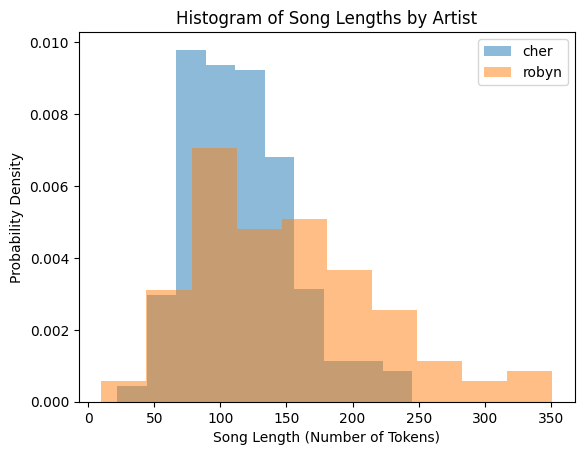

In [92]:
import matplotlib.pyplot as plt


# Create a new dataframe with song lengths
song_lengths = lyrics_data.groupby('artist')['lyrics_clean'].apply(lambda x: x.str.len()).reset_index()

# Plot the histogram
song_lengths.groupby('artist')['lyrics_clean'].plot(kind="hist", density=True, alpha=0.5, legend=True)
# Add labels and title to the plot
plt.xlabel('Song Length (Number of Tokens)')
plt.ylabel('Probability Density')
plt.title('Histogram of Song Lengths by Artist')

# Show the plot
plt.show()

In [93]:
song_lengths

,artist,level_1,lyrics_clean
0,cher,104,80
1,cher,105,147
2,cher,106,160
3,cher,107,82
4,cher,108,89
...,...,...,...
415,robyn,99,114
416,robyn,100,173
417,robyn,101,188
418,robyn,102,67


Since the lyrics may be stored with carriage returns or tabs, it may be useful to have a function that can collapse whitespace, using regular expressions, and be used for splitting. 

Q: What does the regular expression `'\s+'` match on? 

A: The \s is used to match a single whitespace character (tab, newline), the + is used to match one or more of the preceding element which mean one or more white space characters. 


In [87]:
collapse_whitespace = re.compile(r'\s+')

def tokenize_lyrics(lyric) : 
    """strip and split on whitespace"""
    return([item.lower() for item in collapse_whitespace.split(lyric)])

In [117]:
lyrics_data[['tokenized_lyrics']]

,tokenized_lyrics
0,"[""include, me, out"", it, is, really, very, sim..."
1,"[""electric"", electric..., it's, electric, it's..."
2,"[""beach, 2k20"", (so, you, wanna, go, out?, how..."
3,"[""love, kills"", if, you're, looking, for, love..."
4,"[""time, machine"", hey,, what, did, i, do?, can..."
...,...
415,"[""take, it, from, the, boys"", so, scared, i, n..."
416,"[""dream, baby"", i, found, the, boy, for, me, h..."
417,"[""please, don't, tell, me"", ya, shook, the, ov..."
418,"[""i, hope, you, find, it"", these, clouds, aren..."


In [118]:
lyrics_data['tokenized_lyrics'] = lyrics_data['lyrics'].apply(tokenize_lyrics)
song_lengths_2 = lyrics_data.groupby('artist')['tokenized_lyrics'].apply(lambda x: x.str.len()).reset_index()

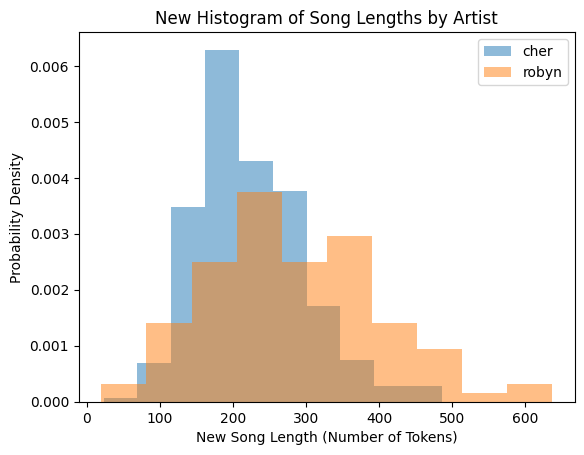

In [120]:
# Your lyric length comparison chart here. 

# Plot the histogram
song_lengths_2.groupby('artist')['tokenized_lyrics'].plot(kind="hist", density=True, alpha=0.5, legend=True)
# Add labels and title to the plot
plt.xlabel('New Song Length (Number of Tokens)')
plt.ylabel('Probability Density')
plt.title('New Histogram of Song Lengths by Artist')

# Show the plot
plt.show()